In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

In [2]:
def rargmax(vector):
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return pr.choice(indices)

In [3]:
register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
            'is_slippery': False}
)
env = gym.make('FrozenLake-v3')

[2017-03-20 14:19:01,755] Making new env: FrozenLake-v3


Success rate: 0.9835
Final Q-Table Values
LEFT DOWN RIGHT UP
[[ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  0.]]


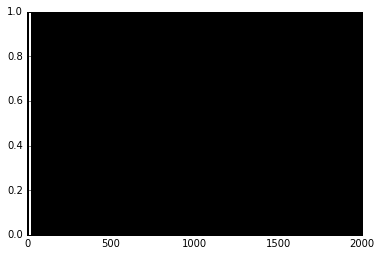

In [6]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

num_episodes = 2000
dis = .99

rList = []
for i in range(num_episodes):
    state = env.reset()
    rAll = 0
    done = False
    
    while not done:
        action = rargmax(Q[state, :])
            
        new_state, reward, done,_ = env.step(action)
        
        Q[state,action] = reward + np.max(Q[new_state,:]) # Q update
        
        rAll += reward
        state = new_state
        
    rList.append(rAll)

print("Success rate: " + str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()
        

Success rate: 0.7605
Final Q-Table Values
LEFT DOWN RIGHT UP
[[ 0.94148015  0.95099005  0.93206535  0.94148015]
 [ 0.94148015  0.          0.92274469  0.93206535]
 [ 0.93206535  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.95099005  0.96059601  0.          0.94148015]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.9801      0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.96059601  0.          0.970299    0.95099005]
 [ 0.96059601  0.9801      0.9801      0.        ]
 [ 0.970299    0.99        0.          0.970299  ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.9801      0.99        0.970299  ]
 [ 0.9801      0.99        1.          0.9801    ]
 [ 0.          0.          0.          0.        ]]


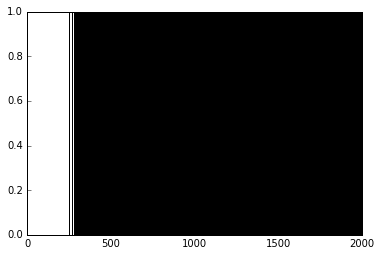

In [7]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

num_episodes = 2000
dis = .99

rList = []
for i in range(num_episodes):
    state = env.reset()
    rAll = 0
    done = False
    
    e = 1./((i/100)+1)
    
    while not done:
        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action = rargmax(Q[state, :])
            
        new_state, reward, done,_ = env.step(action)
        
        Q[state,action] = reward + dis * np.max(Q[new_state,:])
        
        rAll += reward
        state = new_state
        
    rList.append(rAll)

print("Success rate: " + str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()
        